# Data Science

## What is Data Science?

Data science is the discipline of drawing conclusions from data using computation. Data science involves 3 main steps in the workflow:
* Exploration
    * Identifying patterns in information
        * Example: You go to a Safeway market and notice that the price of chicken fluctuates throughout the week. You usually go to market on Sundays because that's when chickens are one sale: they are one dollar! However, you don't know the sale schedule
    * Uses visualization
        * For example: plot when the chickens are on sale so that you'll see a pattern
* Inference : Decide whether the pattern that we observe is the actual pattern
    * Quantifying whether those patterns are reliable
        * If you're in the market 3 Sundays in a row and you see the chickens are one dollar, then you go on Wednesday and see the chickens are 2 dollars, we don't know if that pattern will be true all the time
    * Uses randomization
* Prediction: Using the data that we have seen previously to draw a conclusion and decide the next steps
    * Example: now that you have gone to Safeway many times, you decided that it's ideal to go to Safeway on Sunday mornings so that you can buy all the chickens for one dollar each.
    * Making informed guesses
    * Uses machine learning

# Connector Classes
Data science does not exist from nothingness. Although in this class we focus on the fundamentals of data science, 
* Data science is driven by applications
* Every data-driven subject brings new challenges
* Thus, there are [connector classes](https://data.berkeley.edu/education/connectors) for the Data 8 class
* Connector classes are small, independent courses taught by Berkeley faculty who share their expertise:
    * Public health
    * Law
    * Ecology (e.g. global warming, sea level)
* No connectors in the summer, take during the semester

## Demo
Every single notebook usually starts with a chunk of ugly code below. For now, don't worry about it.

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from ipywidgets import *

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

## Little Women

In this example, we're going to explore statistics of the classic novel *Little Women* by Louisa May Alcott. If we open the following [URL](https://www.inferentialthinking.com/data/little_women.txt), we can see the whole text.

From reading the first few text of the novel, we can draw some conclusions from this text (which is a form of data). We can conclude that some of the characters in the novel are probably spoiled. If we want to draw more conclusion from this text without having to read the whole textbook, we can process the text using the computer.

In [7]:
#Assign the whole text to the name 'little_women_url'
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
#Read into the url and assign it to name 'little_women_text'
little_women_text = read_url(little_women_url)
chapters = little_women_text.split('CHAPTER ')[1:]

In [3]:
Table().with_columns('Text', chapters)

Text
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


Above, we have a table in which each row contains the entire text of each chapter. We can see that we have a total of 47 chapters! Now what if we want to know how many times the word `Christmas` appears in the text?

In [4]:
np.char.count(chapters, 'Christmas')

array([8, 9, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

Above, the output is an array! Each number corresponds to a chapter in the text, and the number tells us how many times the word `Christmas` appear in that chapter.
* In chapter 1, the word `Christmas` appears 8 times
* In chapter 2, it appears 9 times
* In chapter 3, it appears once
* and so on

Even from this output of numbers, we can already see some patterns!

The text *Little Women* involves 4 sisters. We can analyze how many times their names appear in the text.

In [12]:
Table().with_columns(
    'Jo', np.char.count(chapters, 'Jo'),
    'Meg', np.char.count(chapters, 'Meg'),
    'Amy', np.char.count(chapters, 'Amy'),
    'Beth', np.char.count(chapters, 'Beth')
)

Jo,Meg,Amy,Beth
44,26,23,26
21,20,13,12
62,36,2,2
34,17,14,18
55,13,6,14
13,5,6,28
9,5,27,5
71,16,48,9
21,71,3,5
12,4,5,5


From the numbers above, we can try to conclude some pattern. However, it would be much more convenient if we can visualize the data above and observe the pattern from the visualization.

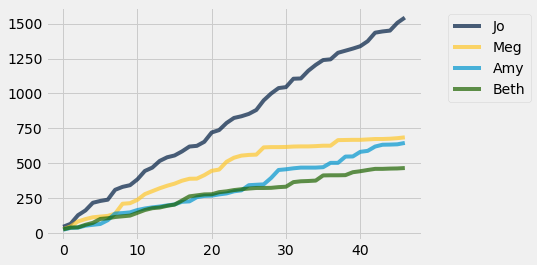

In [11]:
# `cumsum` means cumulative sum
# For example, with `Jo`, at x-axis 1 the y-axis is 44
# at x-axis 2, the y-axis is 44 + 21 = 65

#overlay means have the different plots stacked in one plot
Table().with_columns(
    'Jo', np.char.count(chapters, 'Jo'),
    'Meg', np.char.count(chapters, 'Meg'),
    'Amy', np.char.count(chapters, 'Amy'),
    'Beth', np.char.count(chapters, 'Beth')
).cumsum().plot(overlay = True)

By chapter 10, `Jo` has been mentioned about 400 times. By chapter 20, it has been mentioned roughly 700 times.

Just from the above plot, we can see which character seem important and which character might seem not so important.

Now we're going to see if we can also analyze the amount of times a certain `name` that we put ourselves appear in the text.

In [14]:
def plot_custom(name):
    Table().with_columns([
    'Jo', np.char.count(chapters, 'Jo'),
    'Meg', np.char.count(chapters, 'Meg'),
    'Amy', np.char.count(chapters, 'Amy'),
    'Beth', np.char.count(chapters, 'Beth'),
    name, np.char.count(chapters, name)]
).cumsum().plot(overlay = True)
    plots.show()
    
_ = interact_manual(plot_custom, name = 'Ron')    

interactive(children=(Text(value='Ron', description='name'), Button(description='Run Interact', style=ButtonSt…

We can see above that the name `Ron` is probably not in the text at all! We can change the input name and see if other names are in the text. 

In [15]:
def plot_custom(name):
    Table().with_columns([
    'Jo', np.char.count(chapters, 'Jo'),
    'Meg', np.char.count(chapters, 'Meg'),
    'Amy', np.char.count(chapters, 'Amy'),
    'Beth', np.char.count(chapters, 'Beth'),
    name, np.char.count(chapters, name)]
).cumsum().plot(overlay = True)
    plots.show()
    
_ = interact_manual(plot_custom, name = 'Laurie')    

interactive(children=(Text(value='Laurie', description='name'), Button(description='Run Interact', style=Butto…

If we input the name `Laurie`, it appears that `Laurie` appears quite a few times in the text! `Laurie` is the boy next door. From the plot above, we can see that `Laurie` was not mentioned at all for the first few chapters. 

We can also look at the plot and draw some conclusions about the relationship of characters. Around chapter 35, we can see that the line for `Amy` is roughly close to that of `Laurie`, which implies that every time the name `Amy` is mentioned, the name `Laurie` is also mentioned alongside. In the text, `Amy` and `Laurie` indeed become close to each other and eventually married to each other! This is an example that from data visualization, we can not only deduce who's important in the novel, but also the nature of relationships between characters in the novel.

This time, we're going to count the number of times the period `.` appears in the novel.

In [16]:
np.char.count(chapters, '.')

array([189, 188, 231, 195, 255, 140, 131, 214, 337, 185, 193, 429, 175,
       180, 181, 172, 155, 144, 121, 145, 269, 120, 247, 182,  91, 150,
       109, 271, 233, 218, 178, 224, 232, 257, 201, 100, 157, 206, 263,
        61, 187, 118, 305,  95,  96, 234, 392])

We'll also calculate the number of characters in each chapter and compare it with the number of periods.

In [19]:
Table().with_columns([
    'Characters', [len(i) for i in chapters],
    'Periods', np.char.count(chapters, '.')
])

Characters,Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


Unlike the previous plot, rather than taking the cumsum, this time we construct a scatter plot.

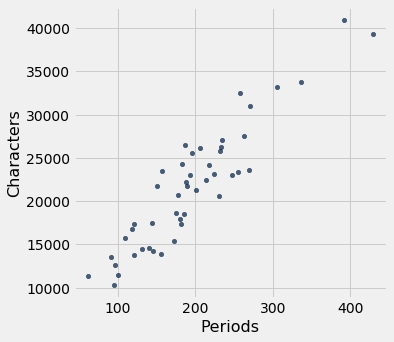

In [20]:
Table().with_columns([
    'Characters', [len(i) for i in chapters],
    'Periods', np.char.count(chapters, '.')
]).scatter('Periods') # "Periods" on the x-axis

The data points appear to follow a straight upward-looking line. It appears that there is a positive correlation between the number of characters and the periods: when you increase the number of characters, the number of periods also increase.

The reason we made the plot above was so that we can analyze the length of the sentences in the novel. Whenever we start a sentence, we end it with a period.
* There is a data point at around 400 periods with around 40,000 characters
    * Each sentence is about 100 characters long
* The data points at around 200 periods have roughly 20,000-25,000 characters. 
    * Which means each sentence has 100-150 characters